# Machine learning model to predict employee attrition.
# Model will be a classification algorithm ensemble or clustering, we shall see.
# Date: 15 - Apr - 2023.
# As usual, a boredom project

In [1]:
# This is where we begin importing libraries
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
#import our data source for preliminary analysis
df = pd.read_csv('./desktop/attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#check for null columns
nandf= df[df.isna().any(axis = 1)]
nandf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


## For some analysis

<AxesSubplot:xlabel='Attrition', ylabel='count'>

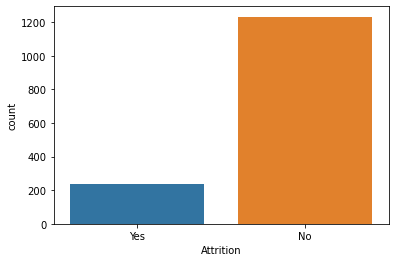

In [4]:
#First lets see how prevelant attrition is in this data set
sns.countplot(x = 'Attrition', data = df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

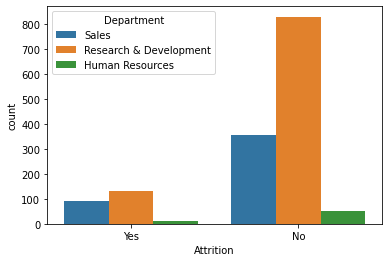

In [5]:
#Lets compare attrition rate by dept
sns.countplot (x= 'Attrition', hue = 'Department', data = df)

### Seems attrition is higher and lower among R&D staff, lets see if this has anything to do with their number compared to other staff.

<AxesSubplot:xlabel='Department', ylabel='count'>

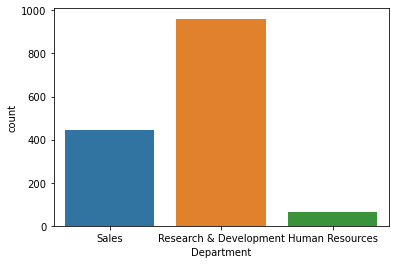

In [6]:
#Number of staff by department
sns.countplot(x = 'Department', data = df)

<AxesSubplot:xlabel='Department', ylabel='count'>

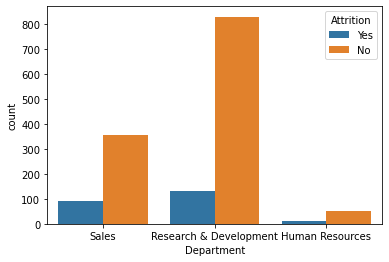

In [7]:
#Lets compare attrition rate by dept
sns.countplot (x= 'Department', hue = 'Attrition', data = df)

#### Seems Human resources might have a higher rate of attrition per staff than other departments

### As suspected, the high attrition rate is tied to the vast number of R&D staff compared to other departments (as obvious as this may seem, this is not usually a given).


<AxesSubplot:xlabel='Attrition', ylabel='count'>

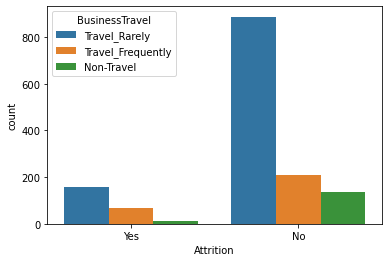

In [8]:
#Lets compare attrition rate by travel
sns.countplot (x= 'Attrition', hue = 'BusinessTravel', data = df)

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

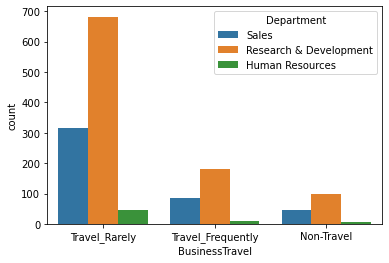

In [9]:
#Lets compare Travel rate by Dept
sns.countplot (x= 'BusinessTravel', hue = 'Department', data = df)

<AxesSubplot:xlabel='Attrition', ylabel='DailyRate'>

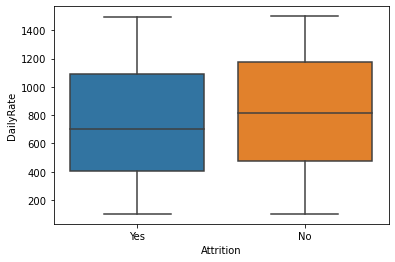

In [10]:
#comparing attrition by daily rate
sns.boxplot(x = 'Attrition', y = 'DailyRate', data = df)

<AxesSubplot:xlabel='Attrition', ylabel='Age'>

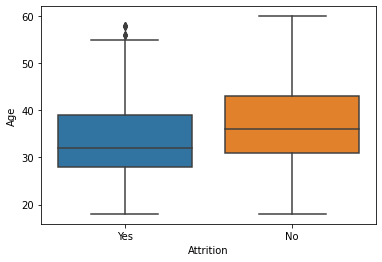

In [11]:
#comparing attrition by age
sns.boxplot(x = 'Attrition', y = 'Age', data = df)

<AxesSubplot:xlabel='Department', ylabel='Age'>

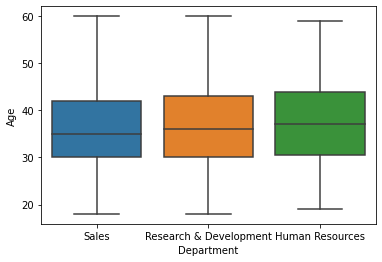

In [12]:
#comparing Department by Age
sns.boxplot(x = 'Department', y = 'Age', data = df)

<AxesSubplot:xlabel='EducationField', ylabel='Age'>

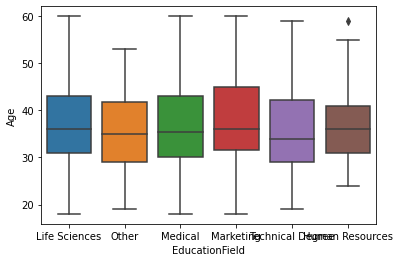

In [13]:
#comparing Course of study by Age
sns.boxplot(x = 'EducationField', y = 'Age', data = df)

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

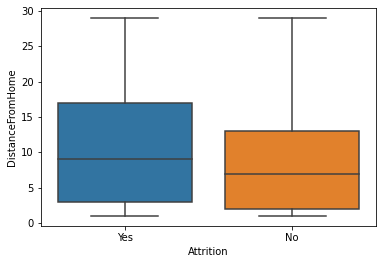

In [14]:
#comparing attrition by distance from home
sns.boxplot(x = 'Attrition', y = 'DistanceFromHome', data = df)

<AxesSubplot:xlabel='Department', ylabel='DistanceFromHome'>

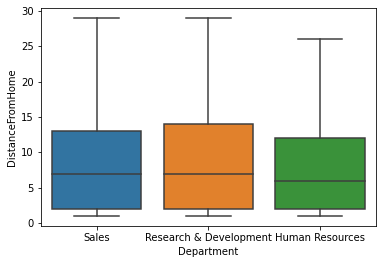

In [15]:
#comparing department by distance from home
sns.boxplot(x = 'Department', y = 'DistanceFromHome', data = df)

<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

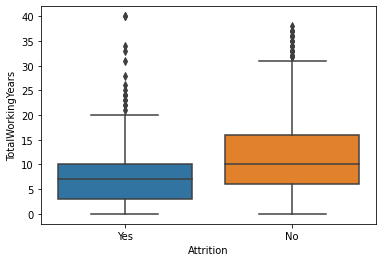

In [16]:
#comparing attrition by Total Working Years
sns.boxplot(x = 'Attrition', y = 'TotalWorkingYears', data = df)

<AxesSubplot:xlabel='Department', ylabel='DailyRate'>

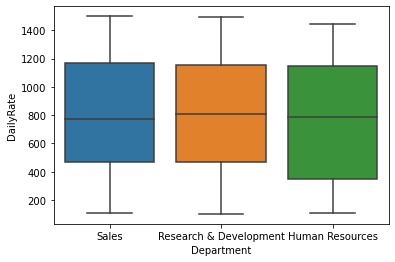

In [17]:
#comparing Department by Daily rate
sns.boxplot(x = 'Department', y = 'DailyRate', data = df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

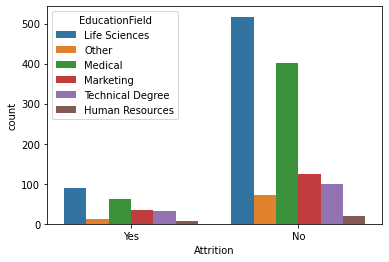

In [18]:
#Attrition vs field of study
sns.countplot(x = 'Attrition', hue = 'EducationField', data = df)

<AxesSubplot:xlabel='Department', ylabel='count'>

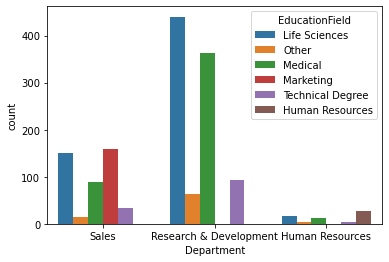

In [19]:
#Department vs field of study
sns.countplot(x = 'Department', hue = 'EducationField', data = df)

### What we learned so far:
### 1. More employees are staying than leaving
### 2. R&D has a higher employee count and as a result a higher attrition count
### 3. Most employees rarely travel for business
### 4. Employees who leave, have lower daily rates than those who stay
### 5. Younger employees are more likely to leave than older, probably because they also earn less.
### 6. People in Sales are younger on average than other departments.
### 7. Employee attrition is also tied to distance from home, people who live farther are more likely to leave.
### 8. R&D staff leave farther from home on average than other departments
### 9. Human resources has the highest paid staff, the oldest staff and highest attrition rate per staff than other departments.
### 10. Age, Hourly rate and Years at company seem to be the leading factors that determine possibility of attrition.

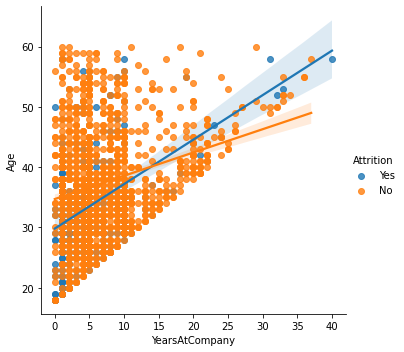

In [20]:
#We want to see how Years at company affects attrition rate
sns.lmplot(x = 'YearsAtCompany', y = 'Age', hue = 'Attrition', data = df)

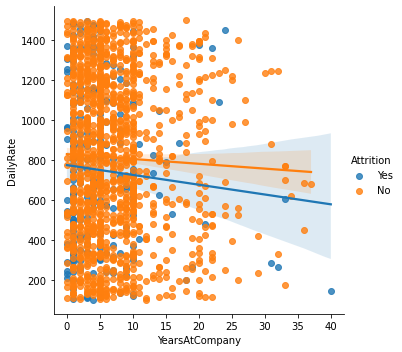

In [21]:
#We want to see how Years at company affects attrition rate
sns.lmplot(x = 'YearsAtCompany', y = 'DailyRate', hue = 'Attrition', data = df)

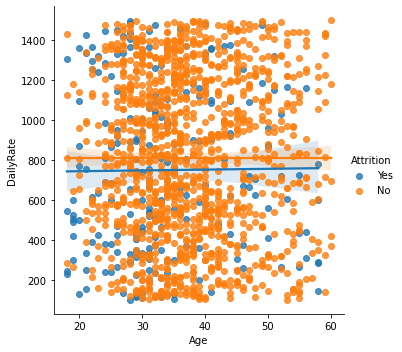

In [22]:

sns.lmplot(x = 'Age', y = 'DailyRate', hue = 'Attrition', data = df)

## Some table modifications to begin creating model

In [23]:
# We convert our attrition information into binary
attr = pd.get_dummies(df['Attrition'], drop_first = True, prefix='Attr')
attr.head(10)

,Attr_Yes
0,1
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [24]:
#Append to our table
df = pd.concat([df, attr], axis = 1)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attr_Yes
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [25]:
# Features dropped for being irrelevant
df.drop(['Attrition', 'BusinessTravel', 'EducationField', 'JobRole', 'StandardHours', 'Over18', 'Department', 'DailyRate', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'HourlyRate', 'MonthlyRate'], axis = 1, inplace = True)

In [26]:
df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attr_Yes
0,41,1,2,2,Female,3,2,4,Single,5993,...,1,0,8,0,1,6,4,0,5,1
1,49,8,1,3,Male,2,2,2,Married,5130,...,4,1,10,3,3,10,7,1,7,0
2,37,2,2,4,Male,2,1,3,Single,2090,...,2,0,7,3,3,0,0,0,0,1
3,33,3,4,4,Female,3,1,3,Married,2909,...,3,0,8,3,3,8,7,3,0,0
4,27,2,1,1,Male,3,1,2,Married,3468,...,4,1,6,3,3,2,2,2,2,0


In [27]:
gender = pd.get_dummies(df['Gender'], drop_first = True)
gender.head()

,Male
0,0
1,1
2,1
3,0
4,1


In [28]:
df = pd.concat([df, gender], axis =1)
df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attr_Yes,Male
0,41,1,2,2,Female,3,2,4,Single,5993,...,0,8,0,1,6,4,0,5,1,0
1,49,8,1,3,Male,2,2,2,Married,5130,...,1,10,3,3,10,7,1,7,0,1
2,37,2,2,4,Male,2,1,3,Single,2090,...,0,7,3,3,0,0,0,0,1,1
3,33,3,4,4,Female,3,1,3,Married,2909,...,0,8,3,3,8,7,3,0,0,0
4,27,2,1,1,Male,3,1,2,Married,3468,...,1,6,3,3,2,2,2,2,0,1


In [29]:
df.drop('Gender', axis = 1, inplace = True)

In [30]:
df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attr_Yes,Male
0,41,1,2,2,3,2,4,Single,5993,8,...,0,8,0,1,6,4,0,5,1,0
1,49,8,1,3,2,2,2,Married,5130,1,...,1,10,3,3,10,7,1,7,0,1
2,37,2,2,4,2,1,3,Single,2090,6,...,0,7,3,3,0,0,0,0,1,1
3,33,3,4,4,3,1,3,Married,2909,1,...,0,8,3,3,8,7,3,0,0,0
4,27,2,1,1,3,1,2,Married,3468,9,...,1,6,3,3,2,2,2,2,0,1


In [31]:
m_status = pd.get_dummies(df['MaritalStatus'], drop_first = True)
m_status.head()

,Married,Single
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [32]:
df = pd.concat([df, m_status], axis = 1)

In [33]:
df.drop(['MaritalStatus'], axis = 1, inplace = True)

In [34]:
df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attr_Yes,Male,Married,Single
0,41,1,2,2,3,2,4,5993,8,Yes,...,0,1,6,4,0,5,1,0,0,1
1,49,8,1,3,2,2,2,5130,1,No,...,3,3,10,7,1,7,0,1,1,0
2,37,2,2,4,2,1,3,2090,6,Yes,...,3,3,0,0,0,0,1,1,0,1
3,33,3,4,4,3,1,3,2909,1,Yes,...,3,3,8,7,3,0,0,0,1,0
4,27,2,1,1,3,1,2,3468,9,No,...,3,3,2,2,2,2,0,1,1,0


In [35]:
ot = pd.get_dummies(df['OverTime'], drop_first = True, prefix = 'Overtime')
ot.head()

,Overtime_Yes
0,1
1,0
2,1
3,1
4,0


In [36]:
df = pd.concat([df, ot], axis = 1)

In [37]:
df.drop(['OverTime'], axis = 1, inplace = True)
df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attr_Yes,Male,Married,Single,Overtime_Yes
0,41,1,2,2,3,2,4,5993,8,11,...,1,6,4,0,5,1,0,0,1,1
1,49,8,1,3,2,2,2,5130,1,23,...,3,10,7,1,7,0,1,1,0,0
2,37,2,2,4,2,1,3,2090,6,15,...,3,0,0,0,0,1,1,0,1,1
3,33,3,4,4,3,1,3,2909,1,11,...,3,8,7,3,0,0,0,1,0,1
4,27,2,1,1,3,1,2,3468,9,12,...,3,2,2,2,2,0,1,1,0,0


In [38]:
# We want to understand correlation among our dataset for better downsizing.
# To do this we'll order our dataset by correlation strength.
# Special credit for this function to stackoverflow user - arun
def get_redundant_pairs(df):
    'get diagonal and lower triangular pairs of matrix'
    pairs_to_drop =set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range (0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_corr(df, n = 11):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
    return au_corr[0:n]

In [39]:
print('Top Absolute correlations')
print(get_top_corr(df))

Top Absolute correlations
JobLevel            MonthlyIncome           0.950300
                    TotalWorkingYears       0.782208
PercentSalaryHike   PerformanceRating       0.773550
MonthlyIncome       TotalWorkingYears       0.772893
YearsAtCompany      YearsWithCurrManager    0.769212
                    YearsInCurrentRole      0.758754
YearsInCurrentRole  YearsWithCurrManager    0.714365
Age                 TotalWorkingYears       0.680381
StockOptionLevel    Single                  0.638957
Married             Single                  0.629981
TotalWorkingYears   YearsAtCompany          0.628133
dtype: float64


In [40]:
# Features dropped for high correlation strength, to avoid dilution in model clarity.
df.drop(['JobLevel', 'TotalWorkingYears', 'PercentSalaryHike', 'YearsWithCurrManager', 'YearsInCurrentRole', 'StockOptionLevel'], axis = 1, inplace = True)
df.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsSinceLastPromotion,Attr_Yes,Male,Married,Single,Overtime_Yes
0,41,1,2,2,3,4,5993,8,3,1,0,1,6,0,1,0,0,1,1
1,49,8,1,3,2,2,5130,1,4,4,3,3,10,1,0,1,1,0,0
2,37,2,2,4,2,3,2090,6,3,2,3,3,0,0,1,1,0,1,1
3,33,3,4,4,3,3,2909,1,3,3,3,3,8,3,0,0,1,0,1
4,27,2,1,1,3,2,3468,9,3,4,3,3,2,2,0,1,1,0,0


## The final step, we're going to predict attrition using 3 classification algorithms.
## To do this and improve performance, we'll be using a voting ensemble (soft voting).
## We'll be using Naive Bayes, Logistic regression and Decision Tree.

In [41]:
#We shall begin as usual by importing from really important libraries
from sklearn.model_selection import train_test_split

In [42]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [43]:
## Picking my dependent (Y) and independent variables (X)
X = df.drop('Attr_Yes', axis = 1)
y = df['Attr_Yes']

In [44]:
#Split our data sets into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [45]:
#We create a tuple of our selected models we want to test
models = [('lr', LogisticRegression(max_iter=4000)), ('nb', GaussianNB()), ('dt', DecisionTreeClassifier())]
#We pick our ensemble type
model = VotingClassifier(models, voting = 'soft')
model.fit(X_train, y_train)
#We make our predictions
predict = model.predict(X_test)

In [46]:
#Next, we evaluate our model performance
accuracy = accuracy_score(predict, y_test)
print(f'Accuracy score: {accuracy:.4f}')

Accuracy score: 0.8490


In [47]:
# Lets check our individual models
# Code courtesy of Changhyun Kim of Medium.com
mod_list = [LogisticRegression(max_iter = 4000), GaussianNB(), DecisionTreeClassifier()]

for models in mod_list:
    models.fit(X_train, y_train)
    predicted = models.predict(X_test)
    accuracy = accuracy_score(predicted, y_test)
    model_name = model.__class__.__name__
    print(f'{model_name}:{accuracy:.4f}')

VotingClassifier:0.8667
VotingClassifier:0.8476
VotingClassifier:0.7864


In [48]:
# Time to save our model for future use
import pickle

In [49]:
filename = 'Class_attrition.sav'
pickle.dump (model, open(filename, 'wb'))

# Finished 17-April-2023